<a href="https://colab.research.google.com/github/ElianaHolanda/Rede-Neural-do-Zero/blob/main/Rede_Neural_do_Zero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [ ]:
transform = transforms. ToTensor() #definindo a conversão de imagem para tensor

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) # Carrega a parte de treino do dataset 
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por partes

valset = datasets.MNIST("./MNIST_data/", download=True, train=False, transform=transform) # Carrega a parte de validação 
valloader = torch.utils.data.DataLoader (valset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por partes


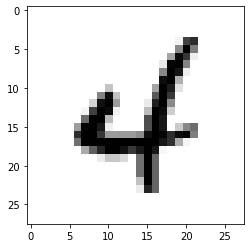

In [ ]:
dataiter = iter(trainloader)
imagens, etiquetas = dataiter.next()
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');


In [ ]:
#Conferindo tamanho da imagem
print(imagens[0].shape)
#Conferindo tamanho da etiqueta
print(etiquetas[0].shape)


torch.Size([1, 28, 28])
torch.Size([])


In [ ]:
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__() 
    self.linear1 = nn.Linear (28*28, 128) # camada de entrada, 784 neurônios que se ligam a 128 
    self.linear2 = nn.Linear(128, 64) # camada interna 1, 128 neurônios que se ligam a 64
    self.linear3 = nn. Linear(64, 10) # camada interna 2, 64 neurônios que se ligam a 10
    # para a camada de saida não e necessário definir nada pois só precisamos pegar o output da camada interna 2

  def forward(self,x):
    X = F.relu(self.linear1(X)) # função de ativação da camada de entrada para a camada interna 1 
    X = F.relu(self.linear2(X)) # função de ativação da camada interna 1 para a camada interna 2
    X = self.linear3 (X) # função de ativação da camada interna 2 para a camada de saída, nesse caso f(x) = x 
    return F.log_softmax(x, dim=1) # dados utilizados para calcular a perda

In [ ]:
def treino(modelo, trainloader, device):
  otimizador = optim.SGD(modelo.parameters(), lr=0.01, momentum=0.5) # define a polítca de atualização dos pesos e da bias inicio time() # timer para sabermos quanto tempo levou o treino
  criterio = nn. NLLLoss() # definindo o criterio para calcular a perda 
  EPOCHS=10 # numero de epochs que o algoritmo rodará
  modelo.train() # ativando o modo de treinamento do modelo
  
  for epoch in range(EPOCHS):
    perda_acumulada = 0 # inicialização da perda acumulada da epoch em questão

    for imagens, etiquetas in trainloader:

      imagens = imagens.view(imagens.shape[0], -1) # convertendo as imagens para "vetores de 28*28 casas para fi 
      otimizador.zero_grad() # zerando os gradientes por conta do ciclo anterior

      output = modelo(imagens.to(device)) # colocando os dados no modelo
      perda_instantanea = criterio (output, etiquetas.to(device)) # calculando a perda da epoch em questão

      perda_instantanea.backward() # back propagation a partir da perda

      otimizador.step() # atualizando os pesos e a bias

      perda_acumulada += perda_instantanea.item() # atualização da perda acumulada

In [ ]:
def validacao(modelo, valloader, device): 
  conta_corretas, conta_todas = 0, 0
  for imagens, etiquetas in valloader:
    for i in range(len(etiquetas)):
      img= imagens[i].view(1, 784)
      #desativar o autograd para acelerar a validação. Grafos computacionais dinâmicos tem um custo alto de processamento 
      with torch.no_grad():
        logps = modelo (img.to(device)) # output do modelo em escala logaritmica

      ps = torch.exp(logps) # converte output para escala normal (lembrando que é um tensor) 
      probab= list(ps.cpu().numpy()[0])
      etiqueta_pred = probab.index (max(probab)) # converte o tensor em um número, no caso, o número que o modelo previu 
      etiqueta_certa = etiquetas.numpy()[i]
      if(etiqueta_certa == etiqueta_pred): # compara a previsão com o valor correto 
        conta_corretas += 1
      conta_todas += 1

  print("Total de imagens testadas", conta_todas)
  print("\nPrecisão do modelo = {}%".format(conta_corretas *100/conta_todas))

In [ ]:
modelo = Modelo()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
modelo.to(device)

Modelo(
  (linear1): Linear(in_features=784, out_features=128, bias=True)
  (linear2): Linear(in_features=128, out_features=64, bias=True)
  (linear3): Linear(in_features=64, out_features=10, bias=True)
)